# 项目：失约医疗预约数据集

## 简介

此数据集包含110,527医疗预约及其14个相关变量（特征），可以被用于探索患者预约后是否失约和其它特征之间的关系。

变量含义：
- `PatientId`：患者身份id
- `AppointmentID`：患者预约id
- `Gender`：患者性别
- `ScheduledDay`：预约的应该到达诊所的日期
- `AppointmentDay`：打电话或注册预约的日期
- `Age`：患者年龄
- `Neighbourhood`：患者所在的街区
- `Scholarship`：是否有奖学金
- `Hipertension`：是否有高血压
- `Diabetes`：是否患有糖尿病
- `Alcoholism`：是否酗酒
- `Handcap`：是否患有残疾
- `SMS_received`：是否收到诊所发的一条或多条短信
- `No-show`：患者是否出现

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./appointments.csv")

In [3]:
original_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


`PatientId`, `AppointmentID`列应改为字符串类型；`Gender`, `No-show`列是分类型数据；`ScheduledDay`, `AppointmentDay`列是日期datetime类型

In [6]:
cleaned_data['PatientId'] = cleaned_data['Gender'].astype('str')
cleaned_data['AppointmentID'] = cleaned_data['AppointmentID'].astype('str')

cleaned_data['Gender'] = cleaned_data['Gender'].astype('category')
cleaned_data['No-show'] = cleaned_data['No-show'].astype('category')

cleaned_data['ScheduledDay'] = pd.to_datetime(cleaned_data['ScheduledDay'], errors='coerce')
cleaned_data['AppointmentDay'] = pd.to_datetime(cleaned_data['AppointmentDay'], errors='coerce')

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [8]:
# 检查缺失值
cleaned_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# 检查重复值
cleaned_data.duplicated().sum()

0

In [10]:
cleaned_data = cleaned_data[cleaned_data["Age"] > 0]

In [11]:
cleaned_data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## **数据分析**

No-show
No     85307
Yes    21680
Name: count, dtype: int64


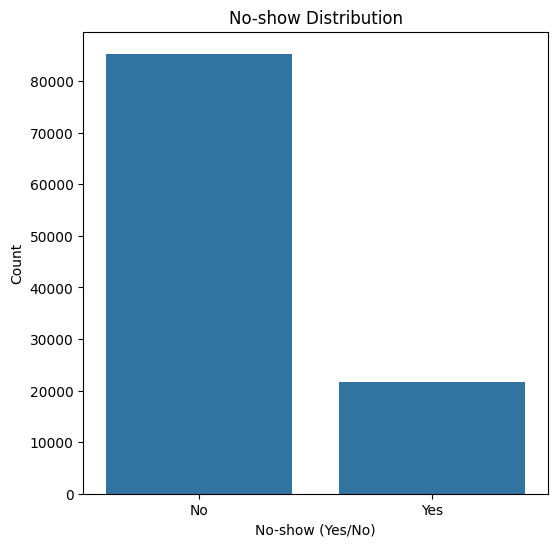

In [12]:
# 检查失约的分布情况
print(cleaned_data['No-show'].value_counts())

# 可视化失约和未失约的比例
plt.figure(figsize=(6, 6))
sns.countplot(x='No-show', data=cleaned_data)
plt.title('No-show Distribution')
plt.xlabel('No-show (Yes/No)')
plt.ylabel('Count')
plt.show()

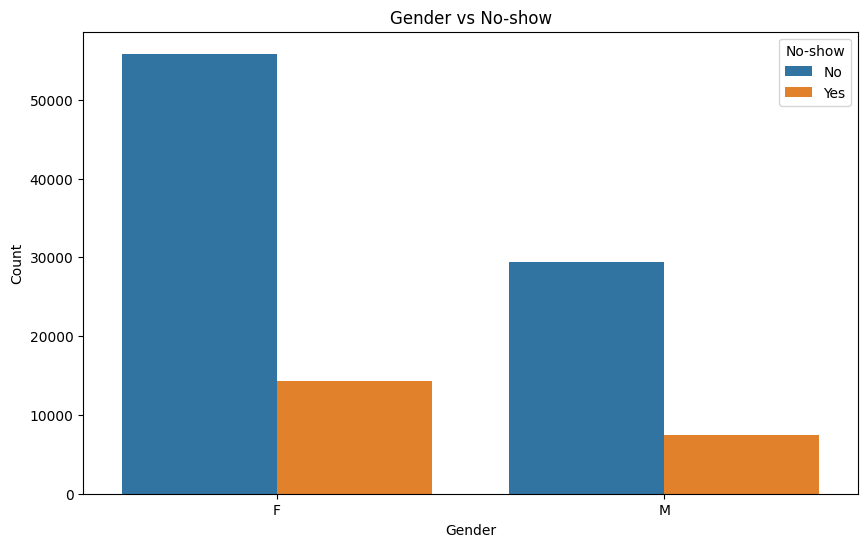

In [13]:
# 性别与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='No-show', data=cleaned_data)
plt.title('Gender vs No-show')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()

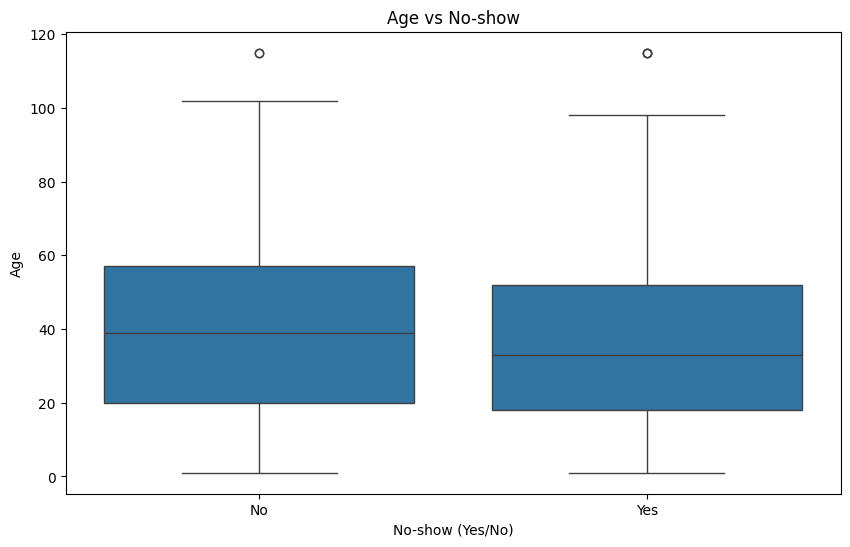

In [14]:
# 年龄与失约的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='No-show', y='Age', data=cleaned_data)
plt.title('Age vs No-show')
plt.xlabel('No-show (Yes/No)')
plt.ylabel('Age')
plt.show()

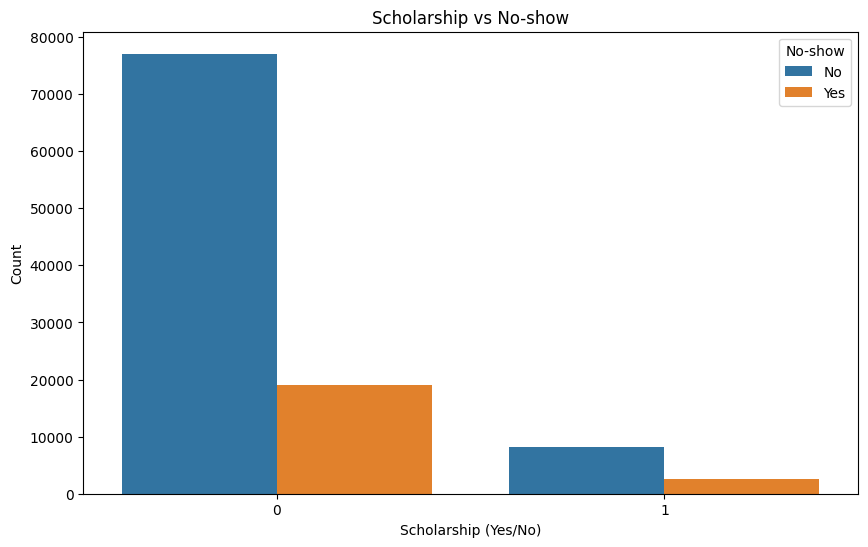

In [15]:
# 奖学金与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='Scholarship', hue='No-show', data=cleaned_data)
plt.title('Scholarship vs No-show')
plt.xlabel('Scholarship (Yes/No)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()

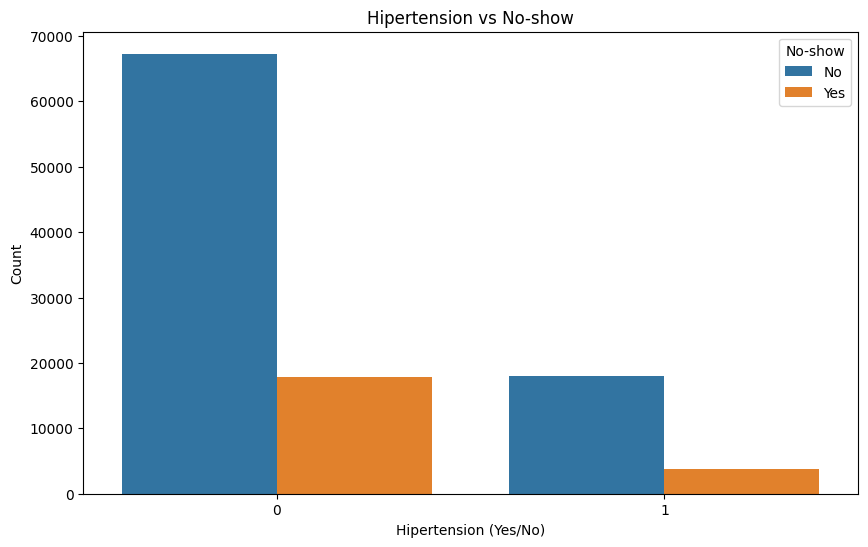

In [16]:
# 高血压与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='Hipertension', hue='No-show', data=cleaned_data)
plt.title('Hipertension vs No-show')
plt.xlabel('Hipertension (Yes/No)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()


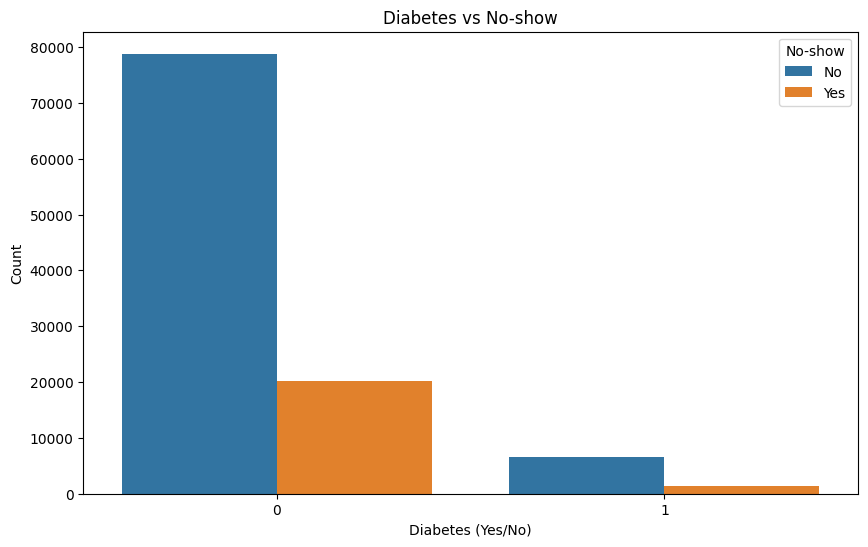

In [17]:
# 糖尿病与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', hue='No-show', data=cleaned_data)
plt.title('Diabetes vs No-show')
plt.xlabel('Diabetes (Yes/No)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()

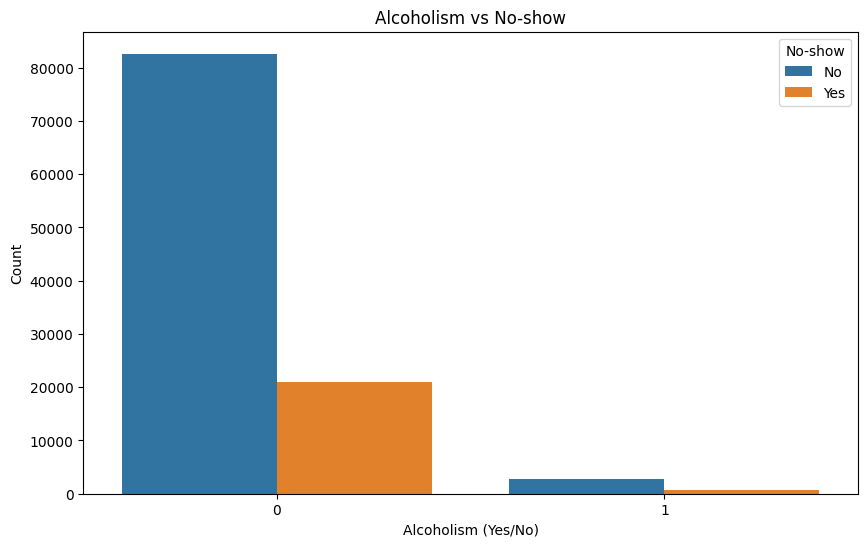

In [18]:
# 酗酒与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='Alcoholism', hue='No-show', data=cleaned_data)
plt.title('Alcoholism vs No-show')
plt.xlabel('Alcoholism (Yes/No)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()

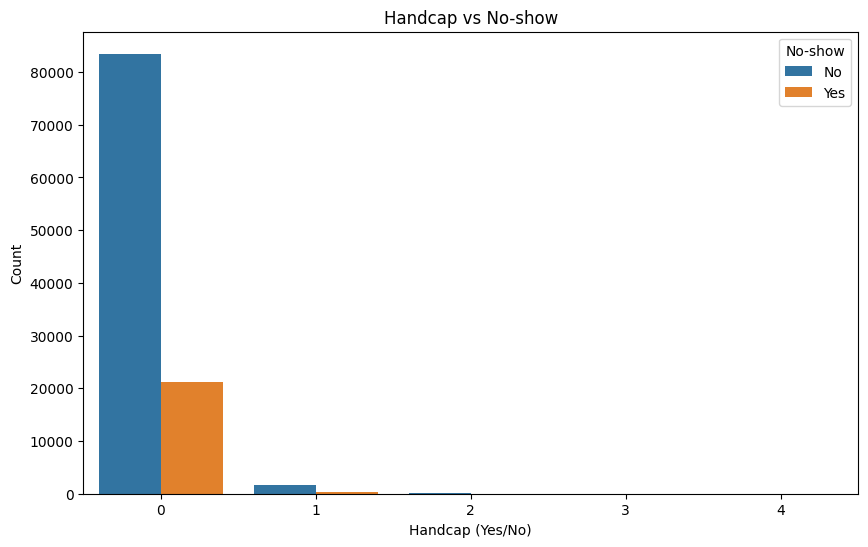

In [19]:
# 残疾与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='Handcap', hue='No-show', data=cleaned_data)
plt.title('Handcap vs No-show')
plt.xlabel('Handcap (Yes/No)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()

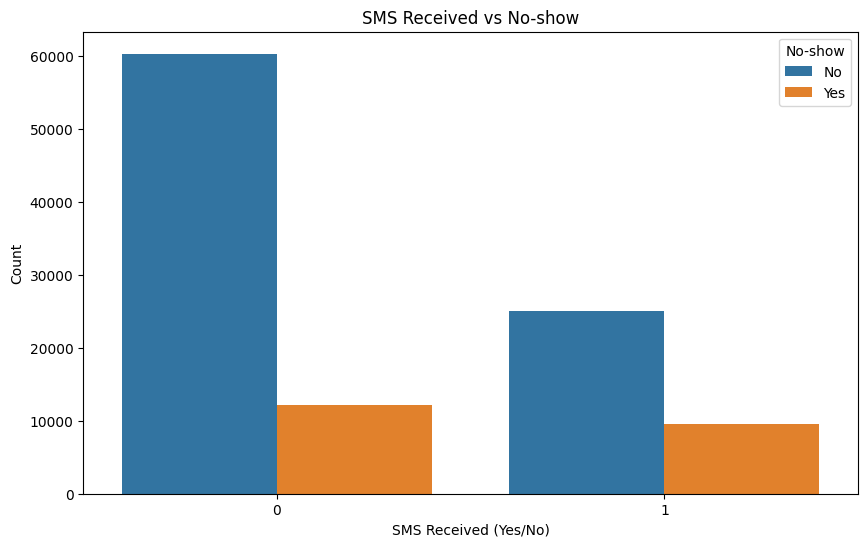

In [20]:
# 短信接收与失约的关系
plt.figure(figsize=(10, 6))
sns.countplot(x='SMS_received', hue='No-show', data=cleaned_data)
plt.title('SMS Received vs No-show')
plt.xlabel('SMS Received (Yes/No)')
plt.ylabel('Count')
plt.legend(title='No-show')
plt.show()

### 相关性分析

使用corr()函数来分析数值变量之间的相关性，特别是年龄、是否患有高血压、糖尿病等

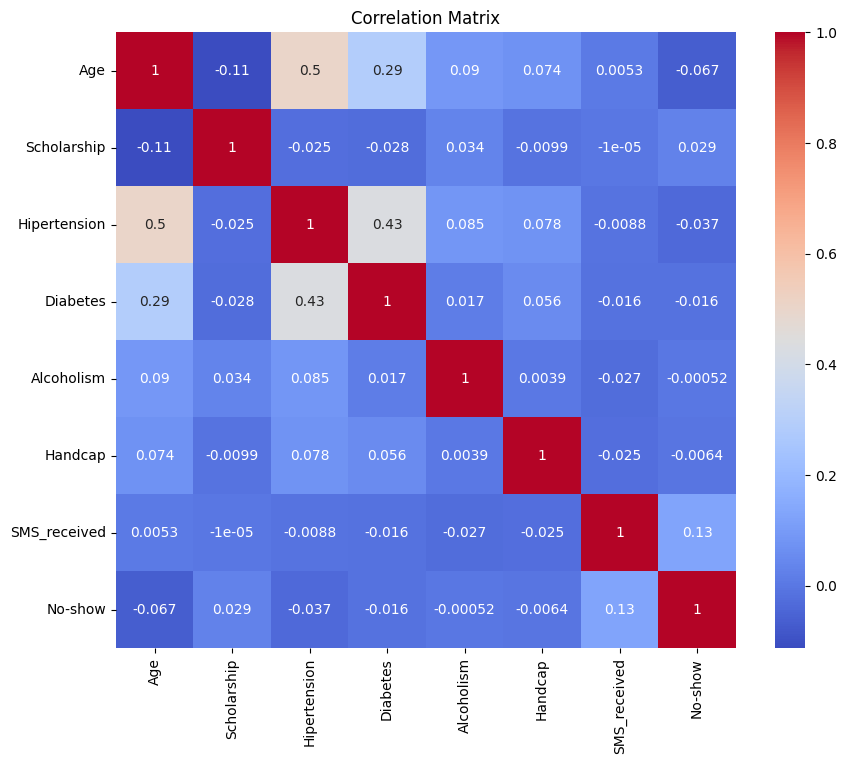

In [21]:
# 将'No-show'列转换为0（未失约）和1（失约）
cleaned_data['No-show'] = cleaned_data['No-show'].map({'No': 0, 'Yes': 1})

# 计算相关矩阵
correlation_matrix = cleaned_data[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']].corr()

# 热力图展示相关性
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 逻辑回归分析

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 自变量和因变量
X = cleaned_data[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]
y = cleaned_data['No-show']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 构建逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 输出模型评估结果
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[25573     0]
 [ 6524     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     25573
           1       0.00      0.00      0.00      6524

    accuracy                           0.80     32097
   macro avg       0.40      0.50      0.44     32097
weighted avg       0.63      0.80      0.71     32097



C:\Users\123\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\123\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\123\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier